In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
#Clone the repository that contain dataset

!git clone https://github.com/aamu14/capstone-bangkit.git

fatal: destination path 'capstone-bangkit' already exists and is not an empty directory.


In [ ]:
#Extract the zip file to tmp directory

local_zip = '/content/capstone-bangkit/mobil.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#Make new 50 directory for each source, training, and dataset.
try:
    os.mkdir('/tmp/datasets')
    os.mkdir('/tmp/datasets/training')
    os.mkdir('/tmp/datasets/testing')
    os.mkdir('/tmp/datasets/training/86')
    os.mkdir('/tmp/datasets/training/C-HR Hybrid')
    os.mkdir('/tmp/datasets/training/C-Hr')
    os.mkdir('/tmp/datasets/training/Hi-Max')
    os.mkdir('/tmp/datasets/training/HiAce')
    os.mkdir('/tmp/datasets/training/Karimun Wagon R')
    os.mkdir('/tmp/datasets/training/Raize')
    os.mkdir('/tmp/datasets/training/Terios')
    os.mkdir('/tmp/datasets/training/Xenia')
    os.mkdir('/tmp/datasets/training/agya')
    os.mkdir('/tmp/datasets/training/all new carry pick up')
    os.mkdir('/tmp/datasets/training/almaz')
    os.mkdir('/tmp/datasets/training/alphard')
    os.mkdir('/tmp/datasets/training/apv arena')
    os.mkdir('/tmp/datasets/training/avanza')
    os.mkdir('/tmp/datasets/training/ayla')
    os.mkdir('/tmp/datasets/training/baleno')
    os.mkdir('/tmp/datasets/training/calya')
    os.mkdir('/tmp/datasets/training/camry')
    os.mkdir('/tmp/datasets/training/camry hybrid')
    os.mkdir('/tmp/datasets/training/confero')
    os.mkdir('/tmp/datasets/training/corolla altis')
    os.mkdir('/tmp/datasets/training/corolla altis hybrid')
    os.mkdir('/tmp/datasets/training/corolla cross')
    os.mkdir('/tmp/datasets/training/cortez')
    os.mkdir('/tmp/datasets/training/ertiga')
    os.mkdir('/tmp/datasets/training/formo')
    os.mkdir('/tmp/datasets/training/fortuner')
    os.mkdir('/tmp/datasets/training/gran max mb')
    os.mkdir('/tmp/datasets/training/gran max pickup')
    os.mkdir('/tmp/datasets/training/hilux d cab')
    os.mkdir('/tmp/datasets/training/hilux s cab')
    os.mkdir('/tmp/datasets/training/ignis')
    os.mkdir('/tmp/datasets/training/jimny')
    os.mkdir('/tmp/datasets/training/juke')
    os.mkdir('/tmp/datasets/training/kijang innova')
    os.mkdir('/tmp/datasets/training/land cruiser')
    os.mkdir('/tmp/datasets/training/luxio')
    os.mkdir('/tmp/datasets/training/rocky')
    os.mkdir('/tmp/datasets/training/rush')
    os.mkdir('/tmp/datasets/training/sienta')
    os.mkdir('/tmp/datasets/training/sigra')
    os.mkdir('/tmp/datasets/training/sirion')
    os.mkdir('/tmp/datasets/training/supra')
    os.mkdir('/tmp/datasets/training/vellfire')
    os.mkdir('/tmp/datasets/training/veloz')
    os.mkdir('/tmp/datasets/training/venturer')
    os.mkdir('/tmp/datasets/training/vios')
    os.mkdir('/tmp/datasets/training/voxy')
    os.mkdir('/tmp/datasets/training/yaris')
    os.mkdir('/tmp/datasets/testing/86')
    os.mkdir('/tmp/datasets/testing/C-HR Hybrid')
    os.mkdir('/tmp/datasets/testing/C-Hr')
    os.mkdir('/tmp/datasets/testing/Hi-Max')
    os.mkdir('/tmp/datasets/testing/HiAce')
    os.mkdir('/tmp/datasets/testing/Karimun Wagon R')
    os.mkdir('/tmp/datasets/testing/Raize')
    os.mkdir('/tmp/datasets/testing/Terios')
    os.mkdir('/tmp/datasets/testing/Xenia')
    os.mkdir('/tmp/datasets/testing/agya')
    os.mkdir('/tmp/datasets/testing/all new carry pick up')
    os.mkdir('/tmp/datasets/testing/almaz')
    os.mkdir('/tmp/datasets/testing/alphard')
    os.mkdir('/tmp/datasets/testing/apv arena')
    os.mkdir('/tmp/datasets/testing/avanza')
    os.mkdir('/tmp/datasets/testing/ayla')
    os.mkdir('/tmp/datasets/testing/baleno')
    os.mkdir('/tmp/datasets/testing/calya')
    os.mkdir('/tmp/datasets/testing/camry')
    os.mkdir('/tmp/datasets/testing/camry hybrid')
    os.mkdir('/tmp/datasets/testing/confero')
    os.mkdir('/tmp/datasets/testing/corolla altis')
    os.mkdir('/tmp/datasets/testing/corolla altis hybrid')
    os.mkdir('/tmp/datasets/testing/corolla cross')
    os.mkdir('/tmp/datasets/testing/cortez')
    os.mkdir('/tmp/datasets/testing/ertiga')
    os.mkdir('/tmp/datasets/testing/formo')
    os.mkdir('/tmp/datasets/testing/fortuner')
    os.mkdir('/tmp/datasets/testing/gran max mb')
    os.mkdir('/tmp/datasets/testing/gran max pickup')
    os.mkdir('/tmp/datasets/testing/hilux d cab')
    os.mkdir('/tmp/datasets/testing/hilux s cab')
    os.mkdir('/tmp/datasets/testing/ignis')
    os.mkdir('/tmp/datasets/testing/jimny')
    os.mkdir('/tmp/datasets/testing/juke')
    os.mkdir('/tmp/datasets/testing/kijang innova')
    os.mkdir('/tmp/datasets/testing/land cruiser')
    os.mkdir('/tmp/datasets/testing/luxio')
    os.mkdir('/tmp/datasets/testing/rocky')
    os.mkdir('/tmp/datasets/testing/rush')
    os.mkdir('/tmp/datasets/testing/sienta')
    os.mkdir('/tmp/datasets/testing/sigra')
    os.mkdir('/tmp/datasets/testing/sirion')
    os.mkdir('/tmp/datasets/testing/supra')
    os.mkdir('/tmp/datasets/testing/vellfire')
    os.mkdir('/tmp/datasets/testing/veloz')
    os.mkdir('/tmp/datasets/testing/venturer')
    os.mkdir('/tmp/datasets/testing/vios')
    os.mkdir('/tmp/datasets/testing/voxy')
    os.mkdir('/tmp/datasets/testing/yaris')
except OSError:
    pass

In [ ]:
# This is split_data function. this function will split the datasets.
# a SOURCE directory containing the original files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copied to
# a SPLIT SIZE to determine the portion
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  files=[]
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print('File is empty')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  
  for filename in training_set:
    src_file = SOURCE + filename
    dest_file = TRAINING + filename
    copyfile(src_file, dest_file)
    
  for filename in testing_set:
    src_file = SOURCE + filename
    dest_file = TESTING + filename
    copyfile(src_file, dest_file)

In [ ]:
# Define 50 variables for source, training, and testing of 50 brand

a86_SOURCE_DIR = "/tmp/mobil/86/"
TRAINING_86_DIR = "/tmp/datasets/training/86/"
TESTING_86_DIR = "/tmp/datasets/testing/86/"
CHRHybrid_SOURCE_DIR = "/tmp/mobil/C-HR Hybrid/"
TRAINING_CHRHybrid_DIR = "/tmp/datasets/training/C-HR Hybrid/"
TESTING_CHRHybrid_DIR = "/tmp/datasets/testing/C-HR Hybrid/"
CHR_SOURCE_DIR = "/tmp/mobil/C-Hr/"
TRAINING_CHR_DIR = "/tmp/datasets/training/C-Hr/"
TESTING_CHR_DIR = "/tmp/datasets/testing/C-Hr/"
HI_MAX_SOURCE_DIR = "/tmp/mobil/Hi-Max/"
TRAINING_HI_MAX_DIR = "/tmp/datasets/training/Hi-Max/"
TESTING_HI_MAX_DIR = "/tmp/datasets/testing/Hi-Max/"
HiAce_SOURCE_DIR = "/tmp/mobil/HiAce/"
TRAINING_HiAce_DIR = "/tmp/datasets/training/HiAce/"
TESTING_HiAce_DIR = "/tmp/datasets/testing/HiAce/"
Karimun_Wagon_R_SOURCE_DIR = "/tmp/mobil/Karimun Wagon R/"
TRAINING_Karimun_Wagon_R_DIR = "/tmp/datasets/training/Karimun Wagon R/"
TESTING_Karimun_Wagon_R_DIR = "/tmp/datasets/testing/Karimun Wagon R/"
Raize_SOURCE_DIR = "/tmp/mobil/Raize/"
TRAINING_Raize_DIR = "/tmp/datasets/training/Raize/"
TESTING_Raize_DIR = "/tmp/datasets/testing/Raize/"
Terios_SOURCE_DIR = "/tmp/mobil/Terios/"
TRAINING_Terios_DIR = "/tmp/datasets/training/Terios/"
TESTING_Terios_DIR = "/tmp/datasets/testing/Terios/"
Xenia_SOURCE_DIR = "/tmp/mobil/Xenia/"
TRAINING_Xenia_DIR = "/tmp/datasets/training/Xenia/"
TESTING_Xenia_DIR = "/tmp/datasets/testing/Xenia/"
agya_SOURCE_DIR = "/tmp/mobil/agya/"
TRAINING_agya_DIR = "/tmp/datasets/training/agya/"
TESTING_agya_DIR = "/tmp/datasets/testing/agya/"
all_new_carry_pick_up_SOURCE_DIR = "/tmp/mobil/all new carry pick up/"
TRAINING_all_new_carry_pick_up_DIR = "/tmp/datasets/training/all new carry pick up/"
TESTING_all_new_carry_pick_up_DIR = "/tmp/datasets/testing/all new carry pick up/"
almaz_SOURCE_DIR = "/tmp/mobil/almaz/"
TRAINING_almaz_DIR = "/tmp/datasets/training/almaz/"
TESTING_almaz_DIR = "/tmp/datasets/testing/almaz/"
alphard_SOURCE_DIR = "/tmp/mobil/alphard/"
TRAINING_alphard_DIR = "/tmp/datasets/training/alphard/"
TESTING_alphard_DIR = "/tmp/datasets/testing/alphard/"
apv_arena_SOURCE_DIR = "/tmp/mobil/apv arena/"
TRAINING_apv_arena_DIR = "/tmp/datasets/training/apv arena/"
TESTING_apv_arena_DIR = "/tmp/datasets/testing/apv arena/"
avanza_SOURCE_DIR = "/tmp/mobil/avanza/"
TRAINING_avanza_DIR = "/tmp/datasets/training/avanza/"
TESTING_avanza_DIR = "/tmp/datasets/testing/avanza/"
ayla_SOURCE_DIR = "/tmp/mobil/ayla/"
TRAINING_ayla_DIR = "/tmp/datasets/training/ayla/"
TESTING_ayla_DIR = "/tmp/datasets/testing/ayla/"
baleno_SOURCE_DIR = "/tmp/mobil/baleno/"
TRAINING_baleno_DIR = "/tmp/datasets/training/baleno/"
TESTING_baleno_DIR = "/tmp/datasets/testing/baleno/"
calya_SOURCE_DIR = "/tmp/mobil/calya/"
TRAINING_calya_DIR = "/tmp/datasets/training/calya/"
TESTING_calya_DIR = "/tmp/datasets/testing/calya/"
camry_SOURCE_DIR = "/tmp/mobil/camry/"
TRAINING_camry_DIR = "/tmp/datasets/training/camry/"
TESTING_camry_DIR = "/tmp/datasets/testing/camry/"
camry_hybrid_SOURCE_DIR = "/tmp/mobil/camry hybrid/"
TRAINING_camry_hybrid_DIR = "/tmp/datasets/training/camry hybrid/"
TESTING_camry_hybrid_DIR = "/tmp/datasets/testing/camry hybrid/"
confero_SOURCE_DIR = "/tmp/mobil/confero/"
TRAINING_confero_DIR = "/tmp/datasets/training/confero/"
TESTING_confero_DIR = "/tmp/datasets/testing/confero/"
corolla_altis_SOURCE_DIR = "/tmp/mobil/corolla altis/"
TRAINING_corolla_altis_DIR = "/tmp/datasets/training/corolla altis/"
TESTING_corolla_altis_DIR = "/tmp/datasets/testing/corolla altis/"
corolla_altis_hybrid_SOURCE_DIR = "/tmp/mobil/corolla altis hybrid/"
TRAINING_corolla_altis_hybrid_DIR = "/tmp/datasets/training/corolla altis hybrid/"
TESTING_corolla_altis_hybrid_DIR = "/tmp/datasets/testing/corolla altis hybrid/"
corolla_cross_SOURCE_DIR = "/tmp/mobil/corolla cross/"
TRAINING_corolla_cross_DIR = "/tmp/datasets/training/corolla cross/"
TESTING_corolla_cross_DIR = "/tmp/datasets/testing/corolla cross/"
cortez_SOURCE_DIR = "/tmp/mobil/cortez/"
TRAINING_cortez_DIR = "/tmp/datasets/training/cortez/"
TESTING_cortez_DIR = "/tmp/datasets/testing/cortez/"
ertiga_SOURCE_DIR = "/tmp/mobil/ertiga/"
TRAINING_ertiga_DIR = "/tmp/datasets/training/ertiga/"
TESTING_ertiga_DIR = "/tmp/datasets/testing/ertiga/"
formo_SOURCE_DIR = "/tmp/mobil/formo/"
TRAINING_formo_DIR = "/tmp/datasets/training/formo/"
TESTING_formo_DIR = "/tmp/datasets/testing/formo/"
fortuner_SOURCE_DIR = "/tmp/mobil/fortuner/"
TRAINING_fortuner_DIR = "/tmp/datasets/training/fortuner/"
TESTING_fortuner_DIR = "/tmp/datasets/testing/fortuner/"
gran_max_mb_SOURCE_DIR = "/tmp/mobil/gran max mb/"
TRAINING_gran_max_mb_DIR = "/tmp/datasets/training/gran max mb/"
TESTING_gran_max_mb_DIR = "/tmp/datasets/testing/gran max mb/"
gran_max_pickup_SOURCE_DIR = "/tmp/mobil/gran max pickup/"
TRAINING_gran_max_pickup_DIR = "/tmp/datasets/training/gran max pickup/"
TESTING_gran_max_pickup_DIR = "/tmp/datasets/testing/gran max pickup/"
hilux_d_cab_SOURCE_DIR = "/tmp/mobil/hilux d cab/"
TRAINING_hilux_d_cab_DIR = "/tmp/datasets/training/hilux d cab/"
TESTING_hilux_d_cab_DIR = "/tmp/datasets/testing/hilux d cab/"
hilux_s_cab_SOURCE_DIR = "/tmp/mobil/hilux s cab/"
TRAINING_hilux_s_cab_DIR = "/tmp/datasets/training/hilux s cab/"
TESTING_hilux_s_cab_DIR = "/tmp/datasets/testing/hilux s cab/"
ignis_SOURCE_DIR = "/tmp/mobil/ignis/"
TRAINING_ignis_DIR = "/tmp/datasets/training/ignis/"
TESTING_ignis_DIR = "/tmp/datasets/testing/ignis/"
jimny_SOURCE_DIR = "/tmp/mobil/jimny/"
TRAINING_jimny_DIR = "/tmp/datasets/training/jimny/"
TESTING_jimny_DIR = "/tmp/datasets/testing/jimny/"
juke_SOURCE_DIR = "/tmp/mobil/juke/"
TRAINING_juke_DIR = "/tmp/datasets/training/juke/"
TESTING_juke_DIR = "/tmp/datasets/testing/juke/"
kijang_innova_SOURCE_DIR = "/tmp/mobil/kijang innova/"
TRAINING_kijang_innova_DIR = "/tmp/datasets/training/kijang innova/"
TESTING_kijang_innova_DIR = "/tmp/datasets/testing/kijang innova/"
land_cruiser_SOURCE_DIR = "/tmp/mobil/land cruiser/"
TRAINING_land_cruiser_DIR = "/tmp/datasets/training/land cruiser/"
TESTING_land_cruiser_DIR = "/tmp/datasets/testing/land cruiser/"
luxio_SOURCE_DIR = "/tmp/mobil/luxio/"
TRAINING_luxio_DIR = "/tmp/datasets/training/luxio/"
TESTING_luxio_DIR = "/tmp/datasets/testing/luxio/"
rocky_SOURCE_DIR = "/tmp/mobil/rocky/"
TRAINING_rocky_DIR = "/tmp/datasets/training/rocky/"
TESTING_rocky_DIR = "/tmp/datasets/testing/rocky/"
rush_SOURCE_DIR = "/tmp/mobil/rush/"
TRAINING_rush_DIR = "/tmp/datasets/training/rush/"
TESTING_rush_DIR = "/tmp/datasets/testing/rush/"
sienta_SOURCE_DIR = "/tmp/mobil/sienta/"
TRAINING_sienta_DIR = "/tmp/datasets/training/sienta/"
TESTING_sienta_DIR = "/tmp/datasets/testing/sienta/"
sigra_SOURCE_DIR = "/tmp/mobil/sigra/"
TRAINING_sigra_DIR = "/tmp/datasets/training/sigra/"
TESTING_sigra_DIR = "/tmp/datasets/testing/sigra/"
sirion_SOURCE_DIR = "/tmp/mobil/sirion/"
TRAINING_sirion_DIR = "/tmp/datasets/training/sirion/"
TESTING_sirion_DIR = "/tmp/datasets/testing/sirion/"
supra_SOURCE_DIR = "/tmp/mobil/supra/"
TRAINING_supra_DIR = "/tmp/datasets/training/supra/"
TESTING_supra_DIR = "/tmp/datasets/testing/supra/"
vellfire_SOURCE_DIR = "/tmp/mobil/vellfire/"
TRAINING_vellfire_DIR = "/tmp/datasets/training/vellfire/"
TESTING_vellfire_DIR = "/tmp/datasets/testing/vellfire/"
veloz_SOURCE_DIR = "/tmp/mobil/veloz/"
TRAINING_veloz_DIR = "/tmp/datasets/training/veloz/"
TESTING_veloz_DIR = "/tmp/datasets/testing/veloz/"
venturer_SOURCE_DIR = "/tmp/mobil/venturer/"
TRAINING_venturer_DIR = "/tmp/datasets/training/venturer/"
TESTING_venturer_DIR = "/tmp/datasets/testing/venturer/"
vios_SOURCE_DIR = "/tmp/mobil/vios/"
TRAINING_vios_DIR = "/tmp/datasets/training/vios/"
TESTING_vios_DIR = "/tmp/datasets/testing/vios/"
voxy_SOURCE_DIR = "/tmp/mobil/voxy/"
TRAINING_voxy_DIR = "/tmp/datasets/training/voxy/"
TESTING_voxy_DIR = "/tmp/datasets/testing/voxy/"
yaris_SOURCE_DIR = "/tmp/mobil/yaris/"
TRAINING_yaris_DIR = "/tmp/datasets/training/yaris/"
TESTING_yaris_DIR = "/tmp/datasets/testing/yaris/"

In [ ]:
#Split data for each brand of car with 80% for training and 20% for testing

split_size = .8
split_data(a86_SOURCE_DIR, TRAINING_86_DIR, TESTING_86_DIR, split_size)
split_data(CHRHybrid_SOURCE_DIR, TRAINING_CHRHybrid_DIR, TESTING_CHRHybrid_DIR, split_size)
split_data(CHR_SOURCE_DIR, TRAINING_CHR_DIR, TESTING_CHR_DIR, split_size)
split_data(HI_MAX_SOURCE_DIR, TRAINING_HI_MAX_DIR, TESTING_HI_MAX_DIR, split_size)
split_data(HiAce_SOURCE_DIR, TRAINING_HiAce_DIR, TESTING_HiAce_DIR, split_size)
split_data(Karimun_Wagon_R_SOURCE_DIR, TRAINING_Karimun_Wagon_R_DIR, TESTING_Karimun_Wagon_R_DIR, split_size)
split_data(Raize_SOURCE_DIR, TRAINING_Raize_DIR, TESTING_Raize_DIR, split_size)
split_data(Terios_SOURCE_DIR, TRAINING_Terios_DIR, TESTING_Terios_DIR, split_size)
split_data(Xenia_SOURCE_DIR, TRAINING_Xenia_DIR, TESTING_Xenia_DIR, split_size)
split_data(agya_SOURCE_DIR, TRAINING_agya_DIR, TESTING_agya_DIR, split_size)
split_data(all_new_carry_pick_up_SOURCE_DIR, TRAINING_all_new_carry_pick_up_DIR, TESTING_all_new_carry_pick_up_DIR, split_size)
split_data(almaz_SOURCE_DIR, TRAINING_almaz_DIR, TESTING_almaz_DIR, split_size)
split_data(alphard_SOURCE_DIR, TRAINING_alphard_DIR, TESTING_alphard_DIR, split_size)
split_data(apv_arena_SOURCE_DIR, TRAINING_apv_arena_DIR, TESTING_apv_arena_DIR, split_size)
split_data(avanza_SOURCE_DIR, TRAINING_avanza_DIR, TESTING_avanza_DIR, split_size)
split_data(ayla_SOURCE_DIR, TRAINING_ayla_DIR, TESTING_ayla_DIR, split_size)
split_data(baleno_SOURCE_DIR, TRAINING_baleno_DIR, TESTING_baleno_DIR, split_size)
split_data(calya_SOURCE_DIR, TRAINING_calya_DIR, TESTING_calya_DIR, split_size)
split_data(camry_SOURCE_DIR, TRAINING_camry_DIR, TESTING_camry_DIR, split_size)
split_data(camry_hybrid_SOURCE_DIR, TRAINING_camry_hybrid_DIR, TESTING_camry_hybrid_DIR, split_size)
split_data(confero_SOURCE_DIR, TRAINING_confero_DIR, TESTING_confero_DIR, split_size)
split_data(corolla_altis_SOURCE_DIR, TRAINING_corolla_altis_DIR, TESTING_corolla_altis_DIR, split_size)
split_data(corolla_altis_hybrid_SOURCE_DIR, TRAINING_corolla_altis_hybrid_DIR, TESTING_corolla_altis_hybrid_DIR, split_size)
split_data(corolla_cross_SOURCE_DIR, TRAINING_corolla_cross_DIR, TESTING_corolla_cross_DIR, split_size)
split_data(cortez_SOURCE_DIR, TRAINING_cortez_DIR, TESTING_cortez_DIR, split_size)
split_data(ertiga_SOURCE_DIR, TRAINING_ertiga_DIR, TESTING_ertiga_DIR, split_size)
split_data(formo_SOURCE_DIR, TRAINING_formo_DIR, TESTING_formo_DIR, split_size)
split_data(fortuner_SOURCE_DIR, TRAINING_fortuner_DIR, TESTING_fortuner_DIR, split_size)
split_data(gran_max_mb_SOURCE_DIR, TRAINING_gran_max_mb_DIR, TESTING_gran_max_mb_DIR, split_size)
split_data(gran_max_pickup_SOURCE_DIR, TRAINING_gran_max_pickup_DIR, TESTING_gran_max_pickup_DIR, split_size)
split_data(hilux_d_cab_SOURCE_DIR, TRAINING_hilux_d_cab_DIR, TESTING_hilux_d_cab_DIR, split_size)
split_data(hilux_s_cab_SOURCE_DIR, TRAINING_hilux_s_cab_DIR, TESTING_hilux_s_cab_DIR, split_size)
split_data(ignis_SOURCE_DIR, TRAINING_ignis_DIR, TESTING_ignis_DIR, split_size)
split_data(jimny_SOURCE_DIR, TRAINING_jimny_DIR, TESTING_jimny_DIR, split_size)
split_data(juke_SOURCE_DIR, TRAINING_juke_DIR, TESTING_juke_DIR, split_size)
split_data(kijang_innova_SOURCE_DIR, TRAINING_kijang_innova_DIR, TESTING_kijang_innova_DIR, split_size)
split_data(land_cruiser_SOURCE_DIR, TRAINING_land_cruiser_DIR, TESTING_land_cruiser_DIR, split_size)
split_data(luxio_SOURCE_DIR, TRAINING_luxio_DIR, TESTING_luxio_DIR, split_size)
split_data(rocky_SOURCE_DIR, TRAINING_rocky_DIR, TESTING_rocky_DIR, split_size)
split_data(rush_SOURCE_DIR, TRAINING_rush_DIR, TESTING_rush_DIR, split_size)
split_data(sienta_SOURCE_DIR, TRAINING_sienta_DIR, TESTING_sienta_DIR, split_size)
split_data(sigra_SOURCE_DIR, TRAINING_sigra_DIR, TESTING_sigra_DIR, split_size)
split_data(sirion_SOURCE_DIR, TRAINING_sirion_DIR, TESTING_sirion_DIR, split_size)
split_data(supra_SOURCE_DIR, TRAINING_supra_DIR, TESTING_supra_DIR, split_size)
split_data(vellfire_SOURCE_DIR, TRAINING_vellfire_DIR, TESTING_vellfire_DIR, split_size)
split_data(veloz_SOURCE_DIR, TRAINING_veloz_DIR, TESTING_veloz_DIR, split_size)
split_data(venturer_SOURCE_DIR, TRAINING_venturer_DIR, TESTING_venturer_DIR, split_size)
split_data(vios_SOURCE_DIR, TRAINING_vios_DIR, TESTING_vios_DIR, split_size)
split_data(voxy_SOURCE_DIR, TRAINING_voxy_DIR, TESTING_voxy_DIR, split_size)
split_data(yaris_SOURCE_DIR, TRAINING_yaris_DIR, TESTING_yaris_DIR, split_size)


In [ ]:
#Make a model with Keras and optimizer with RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(7,7), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(7,7), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(7,7), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(7,7), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
#Training and Validation Generator

TRAINING_DIR = '/tmp/datasets/training'
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                         batch_size=100,
                                                         class_mode='categorical', 
                                                         target_size=(150,150))

VALIDATION_DIR = '/tmp/datasets/testing'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=100,
                                                         class_mode='categorical', 
                                                         target_size=(150,150))

Found 864 images belonging to 50 classes.
Found 233 images belonging to 50 classes.


In [ ]:
#Fit Model
history = model.fit(train_generator,
                              epochs=25,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/25
7/9 [======================>.......] - ETA: 1s - loss: 0.2047 - acc: 0.9424

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 11s 917ms/step - loss: 0.1815 - acc: 0.9511 - val_loss: 0.1030 - val_acc: 0.9800
Epoch 2/25
9/9 [==============================] - 7s 753ms/step - loss: 0.1055 - acc: 0.9800 - val_loss: 0.1115 - val_acc: 0.9800
Epoch 3/25
9/9 [==============================] - 7s 743ms/step - loss: 0.1073 - acc: 0.9800 - val_loss: 0.1024 - val_acc: 0.9800
Epoch 4/25
9/9 [==============================] - 7s 822ms/step - loss: 0.1084 - acc: 0.9800 - val_loss: 0.1021 - val_acc: 0.9800
Epoch 5/25
9/9 [==============================] - 7s 734ms/step - loss: 0.1066 - acc: 0.9800 - val_loss: 0.1107 - val_acc: 0.9800
Epoch 6/25
9/9 [==============================] - 7s 723ms/step - loss: 0.1072 - acc: 0.9800 - val_loss: 0.1013 - val_acc: 0.9800
Epoch 7/25
9/9 [==============================] - 7s 757ms/step - loss: 0.1063 - acc: 0.9800 - val_loss: 0.1133 - val_acc: 0.9800
Epoch 8/25
9/9 [==============================] - 7s 792ms/step - loss: 0.1039 - acc: 0.9800 - val_l

In [ ]:
# save model
model.save('carmodel.h5')
print('Model Saved!')
 
# load model
savedModel=load_model('carmodel.h5')
savedModel.summary()



Text(0.5, 1.0, 'Training and validation loss')

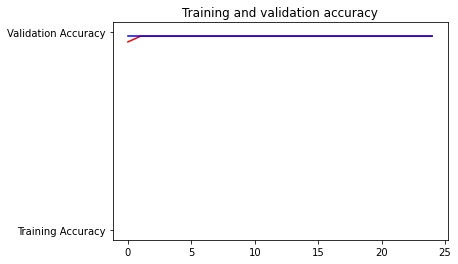

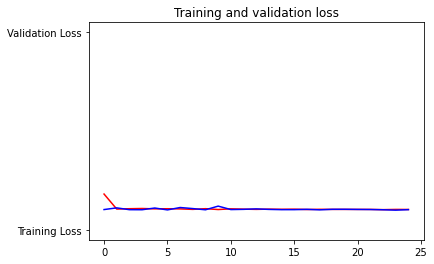

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

Mobil anda adalah :Ertiga


Saving ertiga.jpg to ertiga (2).jpg


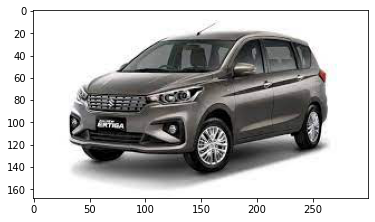

[0.]
data blm masuk


In [ ]:
#Car Picture Upload And Confirmation

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

mobilconfirm=str(input("Mobil anda adalah :"))
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  plt.imshow(load_img(fn))
  plt.show()
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.02 and mobilconfirm=="86":
    print(fn + " Benar 86")
  elif 0.02<classes[0]<0.04 and mobilconfirm=="C-HR Hybrid":
    print(fn + " Benar C-HR Hybrid")  
  elif 0.04<classes[0]<0.06 and mobilconfirm=="C-Hr":
    print(fn + " Benar C-Hr")
  elif 0.08<classes[0]<0.1 and mobilconfirm=="Hi-Max":
    print(fn + " Benar Hi-Max") 
  elif 0.1<classes[0]<0.12 and mobilconfirm=="HiAce":
    print(fn + " Benar HiAce")   
  elif 0.12<classes[0]<0.14 and mobilconfirm=="Karimun Wagon R":
    print(fn + " Benar Karimun Wagon R")
  elif 0.14<classes[0]<0.16 and mobilconfirm=="Raize":
    print(fn + " Benar Raize")
  elif 0.16<classes[0]<0.18 and mobilconfirm=="Terios":
    print(fn + " Benar Terios")
  elif 0.18<classes[0]<0.20 and mobilconfirm=="Xenia":
    print(fn + " Benar Xenia")
  elif 0.20<classes[0]<0.22 and mobilconfirm=="Agya":
    print(fn + " Benar Agya")
  elif 0.22<classes[0]<0.24 and mobilconfirm=="All New Carry Pick Up":
    print(fn + " Benar All New Carry Pick Up")
  elif 0.24<classes[0]<0.26 and mobilconfirm=="Almaz":
    print(fn + " Benar Almaz")
  elif 0.26<classes[0]<0.28 and mobilconfirm=="Alphard":
    print(fn + " Benar Alphard")
  elif 0.28<classes[0]<0.30 and mobilconfirm=="APV Arena":
    print(fn + " Benar APV Arena")
  elif 0.30<classes[0]<0.32 and mobilconfirm=="Avanza":
    print(fn + " Benar Avanza")
  elif 0.32<classes[0]<0.34 and mobilconfirm=="Ayla":
    print(fn + " Benar Ayla")
  elif 0.34<classes[0]<0.36 and mobilconfirm=="Baleno":
    print(fn + " Benar Baleno")
  elif 0.36<classes[0]<0.38 and mobilconfirm=="Calya":
    print(fn + " Benar Calya")
  elif 0.38<classes[0]<0.40 and mobilconfirm=="Camry":
    print(fn + " Benar Camry")
  elif 0.40<classes[0]<0.42 and mobilconfirm=="Camry Hybrid":
    print(fn + " Benar Camry Hybrid")
  elif 0.42<classes[0]<0.44 and mobilconfirm=="Confero":
    print(fn + " Benar Confero")
  elif 0.44<classes[0]<0.46 and mobilconfirm=="Corolla Altis":
    print(fn + " Benar Corolla Altis")
  elif 0.46<classes[0]<0.48 and mobilconfirm=="Corolla Altis Hybrid":
    print(fn + " Benar Corolla Altis Hybrid")
  elif 0.48<classes[0]<0.50 and mobilconfirm=="Corolla Cross":
    print(fn + " Benar Corolla Cross")
  elif 0.50<classes[0]<0.52 and mobilconfirm=="Cortez":
    print(fn + " Benar Cortez")
  elif 0.52<classes[0]<0.54 and mobilconfirm=="Ertiga":
    print(fn + " Benar Ertiga")  
  elif 0.54<classes[0]<0.56 and mobilconfirm=="Formo":
    print(fn + " Benar Formo")
  elif 0.56<classes[0]<0.58 and mobilconfirm=="Fortuner":
    print(fn + " Benar Fortuner") 
  elif 0.58<classes[0]<0.60 and mobilconfirm=="Gran Max MB":
    print(fn + " Benar Gran Max MB")   
  elif 0.60<classes[0]<0.62 and mobilconfirm=="Hilux D Cab":
    print(fn + " Benar Hilux D Cab")
  elif 0.62<classes[0]<0.64 and mobilconfirm=="Hilux S Cab":
    print(fn + " Benar Hilux S Cab")
  elif 0.64<classes[0]<0.66 and mobilconfirm=="Ignis":
    print(fn + " Benar Ignis")
  elif 0.66<classes[0]<0.68 and mobilconfirm=="Jimny":
    print(fn + " Benar Jimny")
  elif 0.68<classes[0]<0.70 and mobilconfirm=="Juke":
    print(fn + " Benar Juke")
  elif 0.70<classes[0]<0.72 and mobilconfirm=="Kijang Innova":
    print(fn + " Benar Kijang Innova")
  elif 0.72<classes[0]<0.74 and mobilconfirm=="Land Cruiser":
    print(fn + " Benar Land Cruiser")
  elif 0.74<classes[0]<0.76 and mobilconfirm=="Luxio":
    print(fn + " Benar Luxio")
  elif 0.76<classes[0]<0.78 and mobilconfirm=="Rocky":
    print(fn + " Benar Rocky")
  elif 0.78<classes[0]<0.80 and mobilconfirm=="Rush":
    print(fn + " Benar Rush")
  elif 0.80<classes[0]<0.82 and mobilconfirm=="Sienta":
    print(fn + " Benar Sienta")
  elif 0.82<classes[0]<0.84 and mobilconfirm=="Sigra":
    print(fn + " Benar Sigra")
  elif 0.84<classes[0]<0.86 and mobilconfirm=="Sirion":
    print(fn + " Benar Sirion")
  elif 0.86<classes[0]<0.88 and mobilconfirm=="Supra":
    print(fn + " Benar Supra")
  elif 0.88<classes[0]<0.90 and mobilconfirm=="Vellfire":
    print(fn + " Benar Vellfire")
  elif 0.90<classes[0]<0.92 and mobilconfirm=="Veloz":
    print(fn + " Benar Veloz")
  elif 0.92<classes[0]<0.94 and mobilconfirm=="Venturer":
    print(fn + " Benar Venturer")
  elif 0.94<classes[0]<0.96 and mobilconfirm=="Vios":
    print(fn + " Benar Vios")
  elif 0.96<classes[0]<0.98 and mobilconfirm=="Voxy":
    print(fn + " Benar Voxy")
  elif 0.98<classes[0]<1.0 and mobilconfirm=="Yaris":
    print(fn + " Benar Yaris")
  else:
    print("data blm masuk")